In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os as os

In [2]:
 os.getcwd()

'D:\\data\\aksam\\FM'

In [3]:
data=pd.read_csv("bank-full.csv",sep="\s+|;", engine='python',na_values=[""," ","  "])

data.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Admin\AppData\Local\Temp\ipykernel_15056\280355694.py:1: SyntaxWarning: invalid escape sequence '\s'
  data=pd.read_csv("bank-full.csv",sep="\s+|;", engine='python',na_values=[""," ","  "])


,"""age","""""job""""","""""marital""""","""""education""""","""""default""""","""""balance""""","""""housing""""","""""loan""""","""""contact""""","""""day""""","""""month""""","""""duration""""","""""campaign""""","""""pdays""""","""""previous""""","""""poutcome""""","""""y"""""""
0,"""58","""""management""""","""""married""""","""""tertiary""""","""""no""""",2143,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",261,1,-1,0,"""""unknown""""","""""no"""""""
1,"""44","""""technician""""","""""single""""","""""secondary""""","""""no""""",29,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",151,1,-1,0,"""""unknown""""","""""no"""""""
2,"""33","""""entrepreneur""""","""""married""""","""""secondary""""","""""no""""",2,"""""yes""""","""""yes""""","""""unknown""""",5,"""""may""""",76,1,-1,0,"""""unknown""""","""""no"""""""
3,"""47","""""blue-collar""""","""""married""""","""""unknown""""","""""no""""",1506,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",92,1,-1,0,"""""unknown""""","""""no"""""""
4,"""33","""""unknown""""","""""single""""","""""unknown""""","""""no""""",1,"""""no""""","""""no""""","""""unknown""""",5,"""""may""""",198,1,-1,0,"""""unknown""""","""""no"""""""


In [4]:
data.columns=data.columns.str.replace('"','')
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
data.dtypes

age          object
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
for i in data.select_dtypes(include=['O']).columns:
    data.loc[:, i] = data.loc[:, i].str.replace('"', '')

In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
data['age']=data['age'].astype('int32')

In [9]:
%run dqr.py

In [10]:
#Create data quality report
report=dataQuality(data)

D:\data\aksam\FM\dqr.py:26: FutureWarning: The provided callable <function min at 0x000001E45F44E8E0> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  xi=data.agg({data.columns[i]:[count,unique,miss_per,np.min,np.max,np.mean,np.median,np.std,q1,q3,q99]})
D:\data\aksam\FM\dqr.py:26: FutureWarning: The provided callable <function max at 0x000001E45F44E7A0> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  xi=data.agg({data.columns[i]:[count,unique,miss_per,np.min,np.max,np.mean,np.median,np.std,q1,q3,q99]})
D:\data\aksam\FM\dqr.py:26: FutureWarning: The provided callable <function mean at 0x000001E45F44F1A0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean"

In [11]:
#Data Quality report for Numeric variables
report['numeric']

,Count,Unique,Miss_per,Min,Max,Mean,Median,Std,Q1,Q3,q99
age,45211.0,77.0,0.0,18.0,95.0,40.936210,39.0,10.618762,33.0,48.0,71.0
balance,45211.0,7168.0,0.0,-8019.0,102127.0,1362.272058,448.0,3044.765829,72.0,1428.0,13164.9
day,45211.0,31.0,0.0,1.0,31.0,15.806419,16.0,8.322476,8.0,21.0,31.0
duration,45211.0,1573.0,0.0,0.0,4918.0,258.163080,180.0,257.527812,103.0,319.0,1269.0
campaign,45211.0,48.0,0.0,1.0,63.0,2.763841,2.0,3.098021,1.0,3.0,16.0
pdays,45211.0,559.0,0.0,-1.0,871.0,40.197828,-1.0,100.128746,-1.0,-1.0,370.0
previous,45211.0,41.0,0.0,0.0,275.0,0.580323,0.0,2.303441,0.0,0.0,8.9


In [12]:
#Data Quality report for categorical variables
report['categorical']

,Count,Unique,Miss_per,Freq_Level,freq_cat_Per
job,45211,14,0.0,blue-collar,0.215257
marital,45211,3,0.0,married,0.601933
education,45211,4,0.0,secondary,0.513194
default,45211,2,0.0,no,0.981973
housing,45211,2,0.0,yes,0.555838
loan,45211,2,0.0,no,0.839774
contact,45211,3,0.0,cellular,0.647741
month,45211,12,0.0,may,0.304483
poutcome,45211,4,0.0,unknown,0.817478
y,45211,2,0.0,no,0.883015


<Axes: xlabel='age', ylabel='balance'>

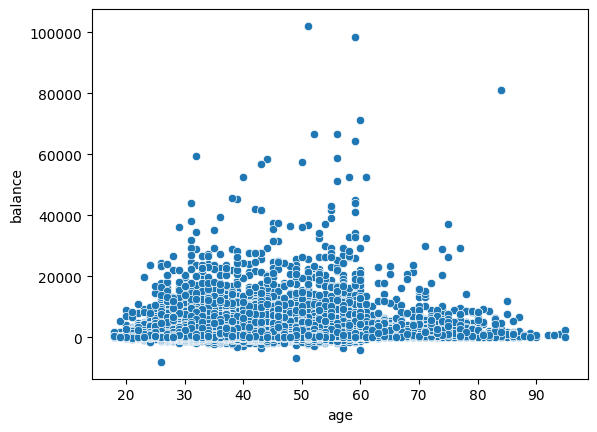

In [13]:
#Age vs Balance
sb.scatterplot(data=data,x='age',y='balance') 

<Axes: ylabel='age'>

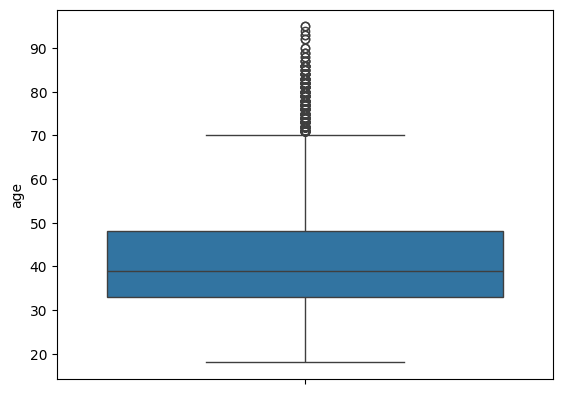

In [14]:
sb.boxplot(data['age'])

<Axes: ylabel='balance'>

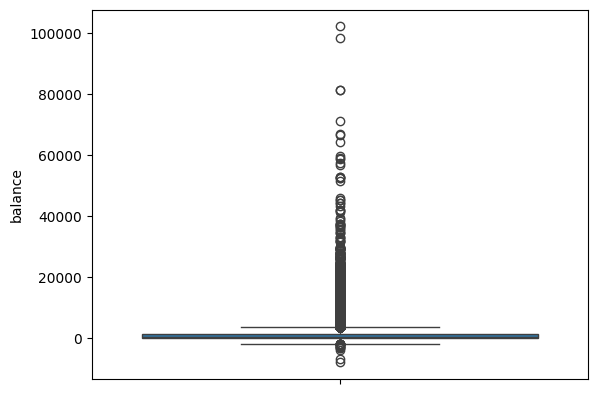

In [15]:
sb.boxplot(data['balance'])

<Axes: ylabel='balance'>

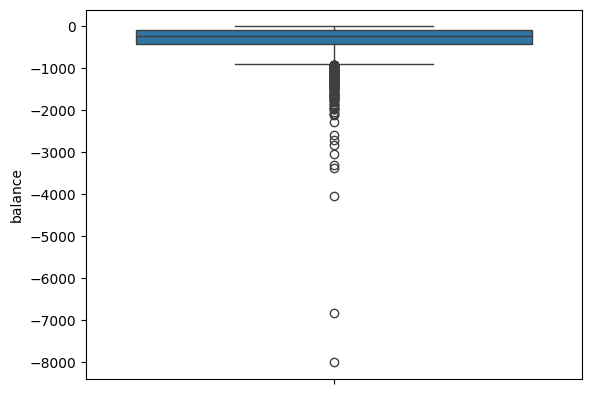

In [16]:
sb.boxplot(data[data['balance']<0]['balance'])

In [17]:
data[data['balance']<-4000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12909,26,blue-collar,single,secondary,yes,-8019,no,yes,cellular,7,jul,299,3,-1,0,unknown,no
15682,49,management,married,tertiary,yes,-6847,no,yes,cellular,21,jul,206,1,-1,0,unknown,no
38736,60,management,divorced,tertiary,no,-4057,yes,no,cellular,18,may,242,6,-1,0,unknown,no


In [18]:
#Select records with balance>-4000 and <=80000
data=data.query("balance>=-4000 and balance<=80000")
data.shape

(45204, 17)

<Axes: ylabel='duration'>

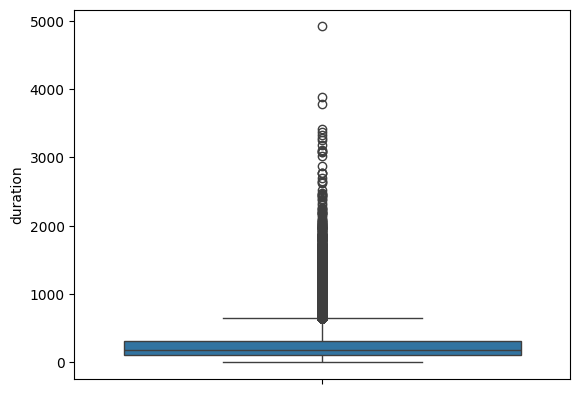

In [19]:
sb.boxplot(data['duration'])

In [20]:
data=data.query("duration<=4000")
data.shape

(45203, 17)

<Axes: ylabel='campaign'>

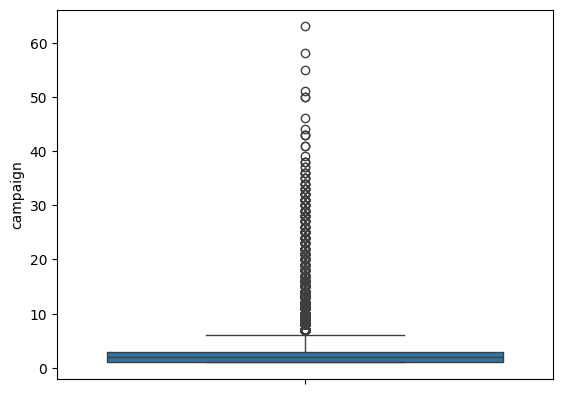

In [21]:
sb.boxplot(data['campaign'])

In [22]:
data=data.query("campaign<=45")
data.shape

(45196, 17)

<Axes: ylabel='pdays'>

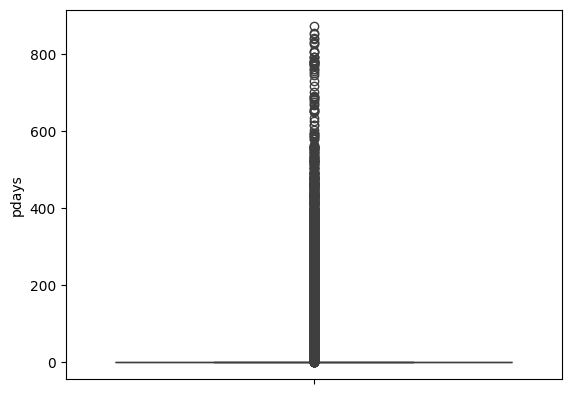

In [23]:
sb.boxplot(data['pdays'])

<Axes: ylabel='previous'>

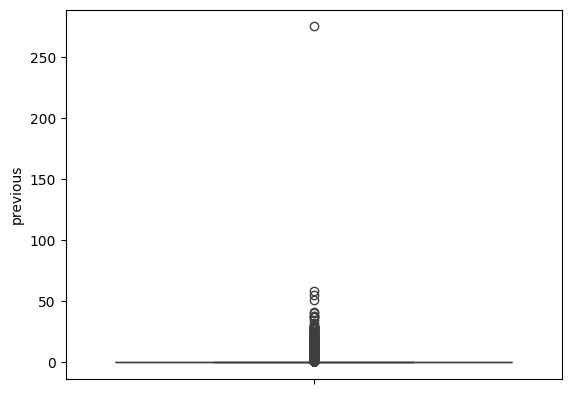

In [24]:
sb.boxplot(data['previous'])

In [25]:
data=data.query("previous<=70")
data.shape

(45195, 17)

In [26]:
#IDV's with 2 categories convert to binary
data['default']=np.where(data['default']=="yes",1,0)
data['loan']=np.where(data['loan']=="yes",1,0)
data['housing']=np.where(data['housing']=="yes",1,0)
data['y']=np.where(data['y']=="yes",1,0)

In [27]:
#Sanity check
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [28]:
#Group Age
def bin(x):
    if x<40:
        return 'Young'
    elif 40<x<=60:
        return "Middle"
    else:
        return "Old"

In [29]:
data['age']=data['age'].map(bin)

In [30]:
data['age'].value_counts()/data.shape[0]

age
Young     0.516761
Middle    0.427038
Old       0.056201
Name: count, dtype: float64

In [31]:
#Term deposit subscription
data['y'].value_counts()/data.shape[0]

y
0    0.883018
1    0.116982
Name: count, dtype: float64

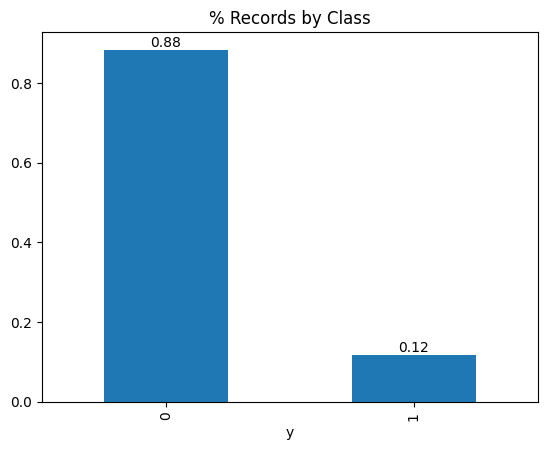

In [151]:
#Term deposit subscription
cls=data['y'].value_counts()/data.shape[0]
ax=cls.plot(kind='bar',title="% Records by Class")

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Format the value (e.g., two decimal places)
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position on top of the bar
                ha='center',  # Center horizontally
                va='bottom',  # Align text to bottom of the value
                fontsize=10)  # Set font size

# Display the plot
plt.show()

Question 1
- There were no missing values in the data.
- Records where balance amount in the range [-4000,80000] were retained.
- Default, loan, housing and target y columns were converted to binary response.
- Customers were grouped into three age groups, young,middle and old.
- Imbalanced data as there were approximately 12% records corresponds to term deposit subscription.

Question 2

Data Level approach to tackle class imbalance
- Over-sampling may lead to over-fitting as it makes exact copies of the minority samples.
- Under-sampling may discard potentially useful majority samples

Ensemble Methods: Combine algorithmic and data approaches to incorporate different misclassification costs for each class in the learning phase.
- Since the data is imbalanced will use class weights to weight classes.

SMOTE: In SMOTE, the training set is altered by adding synthetical(artificially) generated minority class instances, instead of merely copying existing instances in the data. 

In [114]:
#One hot Encoding
X=pd.get_dummies(data.drop('y',axis=1))
X.shape

(45195, 52)

In [115]:
y=data['y']

In [34]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

In [36]:
# # calculate class weighting
# from sklearn.utils.class_weight import compute_class_weight
# weighting = compute_class_weight('balanced', [0,1], y_train)
# weighting

In [37]:
#n_samples / (n_classes * np.bincount(y))
len(y_train)/(2* np.bincount(y_train))

array([0.56624695, 4.27375887])

In [38]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(class_weight='balanced') 
clf.fit(x_train,y_train)

C:\Users\Admin\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [39]:
log=GridSearchCV(clf,param_grid={'C':np.arange(0.1,1,0.1)},n_jobs=-1)
log.fit(x_train,y_train)

C:\Users\Admin\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [40]:
log.best_estimator_

LogisticRegression(C=np.float64(0.1), class_weight='balanced')

In [41]:
log.score(x_test,y_test)

0.8214404248257551

In [42]:
pd.Series(log.predict_proba(x_test)[:,1]).describe()

count    9039.000000
mean        0.324664
std         0.289597
min         0.005175
25%         0.085367
50%         0.223849
75%         0.501829
max         1.000000
dtype: float64

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,log.predict(x_test))

array([[6566, 1416],
       [ 198,  859]])

In [44]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [45]:
#RandomForest
rf=RandomForestClassifier(random_state=1,oob_score=True,class_weight="balanced_subsample")

In [46]:
rf_model=GridSearchCV(rf,param_grid={'n_estimators':np.arange(50,300,50),'max_depth':[4,5],'max_features':[3,5,7,9]},n_jobs=-1)
rf_model.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              oob_score=True, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5], 'max_features': [3, 5, 7, 9],
                         'n_estimators': array([ 50, 100, 150, 200, 250])})

In [47]:
rf=rf_model.best_estimator_

In [48]:
rf.oob_score_

0.8080816461998008

In [49]:
#Average number of correct prediction
rf.score(x_test,y_test)

0.8046244053545746

In [50]:
pd.Series(rf.predict_proba(x_test)[:,1]).describe()

count    9039.000000
mean        0.414513
std         0.145834
min         0.151136
25%         0.308921
50%         0.395370
75%         0.510731
max         0.873785
dtype: float64

In [51]:
confusion_matrix(y_test,rf.predict(x_test))

array([[6404, 1578],
       [ 188,  869]])

In [52]:
#ROC curve: tpr, fpr
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,rf.predict_proba(x_test)[:,1])
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)

Text(0, 0.5, 'True Positive Rate')

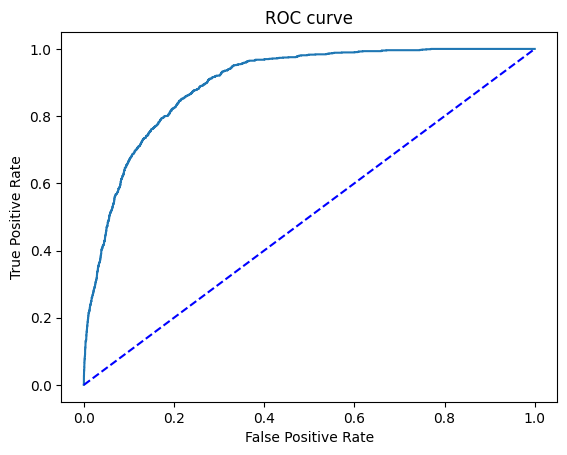

In [53]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.plot(x,y,'b--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [54]:
#!pip install xgboost
import xgboost as xg
xgb=xg.XGBClassifier(objective='binary:logistic',reg_lambda=0.2,max_depth=4,random_state=1,class_weight="balanced") #L2 regularization

In [55]:
xgb=GridSearchCV(xgb, param_grid={'max_depth':[2,3,5],'n_estimators':[50,100,150],'reg_lambda':[0.1,0.2]},n_jobs=-1)
xgb.fit(x_train,y_train)

C:\Users\Admin\anaconda3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:39:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, class_weight='balanced',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=4,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'n_estimators': [50, 100, 150],
                         'reg_lambda': [0.1, 0.2]})

In [56]:
xgb1=xgb.best_estimator_

In [57]:
xgb1.score(x_test,y_test)

0.9091713685142162

In [58]:
pd.Series(xgb1.predict_proba(x_test)[:,1]).describe()

count    9039.000000
mean        0.117657
std         0.207152
min         0.000006
25%         0.003608
50%         0.018581
75%         0.114434
max         0.972779
dtype: float64

In [59]:
confusion_matrix(y_test,xgb1.predict(x_test))

array([[7715,  267],
       [ 554,  503]])

In [60]:
from sklearn.metrics import roc_auc_score,accuracy_score

In [61]:
models={'rf':rf,'xgb':xgb1,'log':log}

def auc_score(x_test,y_test,models):
    model=[]
    for k in models:
        model.append(k)
    auc=[]
    for m in models.values():
        auc.append(roc_auc_score(y_test,m.predict_proba(x_test)[:,1]))
        
    return pd.DataFrame({'Model':model,'auc':auc}).sort_values(by='auc',ascending=False)

In [62]:
auc_score(x_test,y_test,models)

,Model,auc
1,xgb,0.934596
0,rf,0.897391
2,log,0.888307


In [63]:
#Recall: Percentage of positive classes caught by classifer. tp/tp+fn
#Precision: Percentage of positive predictions were correct. tp/tp+fp

In [64]:
x_train.shape

(36156, 52)

In [65]:
# count=y_train.value_counts()
# count[0]

In [66]:
# weight_for_0 = (1 / count[0])*(len(y_train))/2.0 
# weight_for_1 = (1 / count[1])*(len(y_train))/2.0

# class_weight = {0: weight_for_0, 1: weight_for_1}

In [67]:
#Multilayered perceptron
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1,l2

In [68]:
y1=to_categorical(y_train)

In [69]:
from scikeras.wrappers import KerasClassifier
## Grid Search in the number of neurons
def create_model(neurons=1):
    ## Create network architecture
    model=Sequential()
    model.add(Dense(units=neurons,input_dim=(52)))
    model.add(Dense(75,'relu',kernel_regularizer=l1(0.001)))
    model.add(Dense(50,'relu',kernel_regularizer=l1(0.001)))
    model.add(Dense(20,'relu',kernel_regularizer=l1(0.002)))
    model.add(Dense(2,'sigmoid'))
    ## Compile Model
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [74]:
## Create Model
model=KerasClassifier(build_fn=create_model,neurons=100,verbose=0,epochs=30,batch_size=500,class_weight='balanced')

In [75]:
grid=GridSearchCV(estimator=model,param_grid={'neurons':[100,150,250],'batch_size':[500,1000]})
grid_result=grid.fit(np.array(x_train),y1)

C:\Users\Admin\anaconda3\envs\ml\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Admin\anaconda3\envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Admin\anaconda3\envs\ml\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Admin\anaconda3\envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer.

C:\Users\Admin\anaconda3\envs\ml\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Admin\anaconda3\envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


C:\Users\Admin\anaconda3\envs\ml\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Admin\anaconda3\envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Admin\anaconda3\envs\ml\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Admin\anaconda3\envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer.

In [76]:
grid_result.best_params_

{'batch_size': 1000, 'neurons': 250}

In [77]:
nn=grid_result.best_estimator_

In [94]:
#int(nn.predict(x_test)[0][1])

In [98]:
y_preds=pd.Series([int(c[1]) for c in nn.predict(x_test)])
y_preds.value_counts()

1    6281
0    2758
Name: count, dtype: int64

In [99]:
y_test.value_counts()

y
0    7982
1    1057
Name: count, dtype: int64

In [100]:
confusion_matrix(y_test,y_preds)

array([[2746, 5236],
       [  12, 1045]])

In [101]:
#average_precision_score(y_test,nn.predict_proba(x_test)[:,1])

In [102]:
models={'rf':rf,'xgb':xgb1,'log':log,'nn':nn}
from sklearn.metrics import average_precision_score
def pre_score(y_test,models):
    model=[]
    for k in models:
        model.append(k)
    precision=[]
    for m in models.values():
        precision.append(average_precision_score(y_test,m.predict_proba(x_test)[:,1]))
        
    return pd.DataFrame({'Model':model,'precision':precision}).sort_values(by='precision',ascending=False)

In [103]:
pre_score(y_test,models)

,Model,precision
1,xgb,0.621059
0,rf,0.543775
2,log,0.479783
3,nn,0.432696


Question 4
- Since classification goal is to predict term deposit subscription.
- Choose cut of such that TPR is higher with cost of some error in FPR. With 0.4 cut off tpr is higher for xgb1 model.

In [104]:
prob=xgb1.predict_proba(x_test)[:,1]
y_pred=np.where(prob>=0.4,1,0)

In [105]:
confusion_matrix(y_test,y_pred)

array([[7596,  386],
       [ 421,  636]])

In [106]:
#Precision tp/tp+fp
636/(636+386)

0.6223091976516634

In [109]:
#!pip install imblearn

In [117]:
#Create balanced class
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=1)
x_res,y_res=smote.fit_resample(X,y)

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=1)

In [119]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

C:\Users\Admin\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
log1=GridSearchCV(clf,param_grid={'C':np.arange(0.1,1,0.1)},n_jobs=-1)
log1.fit(x_train,y_train)

C:\Users\Admin\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [121]:
log1.best_estimator_

LogisticRegression(C=np.float64(0.4))

In [122]:
from sklearn.metrics import confusion_matrix,average_precision_score
confusion_matrix(y_test,log1.best_estimator_.predict(x_test))

array([[7201,  719],
       [ 993, 7051]])

In [123]:
log1.best_estimator_.score(x_test,y_test)

0.8927587070909546

In [124]:
average_precision_score(y_test,log1.best_estimator_.predict_proba(x_test)[:,1])

np.float64(0.9419666260128973)

In [125]:
pd.Series(log1.best_estimator_.predict_proba(x_test)[:,1]).describe()

count    15964.000000
mean         0.482088
std          0.393605
min          0.000704
25%          0.061598
50%          0.460783
75%          0.910676
max          1.000000
dtype: float64

In [126]:
#RandomForest
rf1=RandomForestClassifier(random_state=1,oob_score=True)

In [127]:
rf_model1=GridSearchCV(rf1,param_grid={'n_estimators':np.arange(50,300,50),'max_depth':[4,5],'max_features':[3,5,7,9]},n_jobs=-1)
rf_model1.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(oob_score=True, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5], 'max_features': [3, 5, 7, 9],
                         'n_estimators': array([ 50, 100, 150, 200, 250])})

In [128]:
model1=rf_model1.best_estimator_
model1

RandomForestClassifier(max_depth=5, max_features=3, n_estimators=np.int64(250),
                       oob_score=True, random_state=1)

In [153]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
r=pd.DataFrame(confusion_matrix(y_test,model1.predict(x_test)))
r.style.background_gradient(cmap=cm)

,0,1
0,7254,666
1,763,7281


In [130]:
average_precision_score(y_test,model1.predict_proba(x_test)[:,1])

np.float64(0.9705912132668797)

In [131]:
pd.Series(model1.predict_proba(x_test)[:,1]).describe()

count    15964.000000
mean         0.500106
std          0.186244
min          0.135163
25%          0.335232
50%          0.498082
75%          0.670246
max          0.843748
dtype: float64

In [132]:
#AUC
roc_auc_score(y_test,model1.predict_proba(x_test)[:,1])

np.float64(0.9686908948384895)

In [133]:
#Multi layered perceptron

In [134]:
y1=to_categorical(y_train)
y1.shape

(63852, 2)

In [139]:
# #MLP Architecture
# model=Sequential()
# model.add(Dense(250,'relu',input_dim=(52)))
# model.add(Dense(100,'relu',kernel_regularizer=l1(0.002)))
# model.add(Dense(50,'relu'))
# model.add(Dense(2,'sigmoid'))

In [140]:
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [141]:
# model.summary()

In [142]:
# history=model.fit(np.array(x_train),y1,epochs=30,batch_size=500,validation_split=0.2)

In [ ]:
# ## Check for overfit
# # Plot training and validation accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

In [ ]:
# pd.Series(model.predict_proba(x_test)[:,1]).describe()

In [143]:
models={'rf':model1,'log':log1} #,'nn':model}

#Precision: Percentage of positive predictions were correct.
def pre_score(y_test,models):
    model=[]
    for k in models:
        model.append(k)
    precision=[]
    for m in models.values():
        precision.append(average_precision_score(y_test,m.predict_proba(x_test)[:,1]))
        
    return pd.DataFrame({'Model':model,'precision':precision}).sort_values(by='precision',ascending=False)

In [144]:
pre_score(y_test,models)

,Model,precision
0,rf,0.970591
1,log,0.941967


Question 3 :
Classification goal is to predict if the client will subscribe a term deposit
- Balancing the classes using class_weight parameter, xgboost model was able to predict 62.2% of term deposit subscription correctly.
- Balancing the classes using SMOTE, RandomForest model was able to predict 97% of term deposit subscription corretly.

Question 5
- Theoretically it is possible to get predicted probabilities equal to 0 and 1 but practical may not be the case. NN model with smote
sampling has predicted probability equal to 1, may lead to overfitting.
- SMOTE sampling + Random Forest model stored as 'rf' can be considered for final prediction as predicted probabilities are in (0,1)
- However, xgboost model stored as 'xgb1'(without smote) looks fine with 0.4 cut off with higher tpr.